# Autocorrelacion espacial

La noción de dependencia espacial o autocorrelación espacial se relaciona con la existencia de una “relación funcional entre lo que sucede en un punto del espacio y lo que sucede en otro lugar”

Por lo tanto, la autocorrelación espacial tiene que ver con el grado en que la similitud en los valores entre las observaciones de un conjunto de datos está relacionada con la similitud en las ubicaciones de tales observaciones. La autocorrelación espacial relaciona el valor de la variable de interés en una ubicación determinada, con los valores de la misma variable en otras ubicaciones.

Para comprender mejor la noción de autocorrelación espacial, conviene comenzar por considerar su **ausencia**. Una idea clave en este contexto es la de la aleatoriedad espacial: una situación en la que la ubicación de una observación no proporciona información alguna sobre su valor. En otras palabras, una variable es espacialmente aleatoria si se distribuye siguiendo un patrón no discernible en el espacio. Por tanto, la autocorrelación espacial puede definirse formalmente como la "ausencia de aleatoriedad espacial". Esta definición hace que la autocorrelación espacial sea un concepto muy amplio y abrumador. Para comprenderlo mejor, la autocorrelación espacial se clasifica típicamente en dos dimensiones principales: signo y escala.

Al igual que en el caso tradicional, no espacial, la autocorrelación espacial puede adoptar dos formas principales: positiva y negativa.

- Lo importante en este contexto es que la relación entre cercanía y similitud estadística es **positiva**. Este es un caso bastante común en muchos contextos sociales y, de hecho, varios fenómenos humanos muestran una autocorrelación espacial claramente positiva. Por ejemplo, piense en la distribución del ingreso, o la pobreza, en el espacio: es común encontrar valores similares ubicados cerca (áreas ricas cercanas a otras áreas ricas, población pobre concentrada también en el espacio). 
    
- En contraste, la autocorrelación espacial **negativa** refleja una situación en la que valores similares tienden a ubicarse alejados unos de otros. La distribución de supermercados de diferentes marcas o de hospitales suele seguir un patrón de dependencia espacial negativa.

La autocorrelación espacial también se puede delimitar por la escala a la que se considera. Hablamos de procesos globales o locales. 
- La autocorrelación espacial **global** , en la que se centra este capítulo, considera la tendencia general que sigue la ubicación de los valores. Al hacer esto, el estudio de la autocorrelatio espacial global hace posibles declaraciones sobre el grado de agrupamiento en el conjunto de datos. ¿Los valores generalmente siguen un patrón particular en su distribución geográfica? ¿Están los valores similares más cerca de otros valores similares de lo que esperaríamos por pura casualidad? Estas son algunas de las preguntas que se relacionan con la autocorrelación espacial global. 

- La autocorrelación **local** se centra en las desviaciones de la tendencia global en niveles mucho más específicos que el mapa completo, y es el tema del próximo capítulo.

Exploraremos estos conceptos con un ejemplo aplicado, interrogando los datos sobre la presencia, naturaleza y fuerza de la autocorrelación espacial global. Para hacer esto, usaremos un conjunto de herramientas conocidas colectivamente como Análisis Exploratorio de Datos Espaciales (ESDA). La gama de métodos ESDA es amplia y abarca desde enfoques más simples como mapas de coropletas (capítulo anterior), hasta metodologías más avanzadas y sólidas que incluyen inferencia estadística y un reconocimiento explícito de la disposición geográfica de los datos.

## Una ilustración empírica: el referéndum del Brexit

In [71]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
#import contextily
# Analysis
import geopandas
import pandas
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

- Datos de la Comisión Electoral sobre porcentajes de voto a nivel de autoridad local.

In [7]:
brexit_data_path = './data/brexit_vote.csv'
ref = pandas.read_csv(brexit_data_path, index_col='Area_Code')
ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, E06000031 to E08000036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area                     382 non-null    object 
 4   Electorate               382 non-null    int64  
 5   ExpectedBallots          382 non-null    int64  
 6   VerifiedBallotPapers     382 non-null    int64  
 7   Pct_Turnout              382 non-null    float64
 8   Votes_Cast               382 non-null    int64  
 9   Valid_Votes              382 non-null    int64  
 10  Remain                   382 non-null    int64  
 11  Leave                    382 non-null    int64  
 12  Rejected_Ballots         382 non-null    int64  
 13  No_official_mark         382 non-null    int64  
 14  Voting_for_both_a

In [9]:
ref.head()

,id,Region_Code,Region,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
Area_Code,,,,,,,,,,,,,,,,,,,,
E06000031,108,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
E06000032,109,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
E06000033,112,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07
E06000034,113,E12000006,East,Thurrock,109897,79969,79954,72.75,79950,79916,22151,57765,34,0,8,3,23,27.72,72.28,0.04
E06000055,110,E12000006,East,Bedford,119530,86136,86136,72.06,86135,86066,41497,44569,69,0,26,1,42,48.22,51.78,0.08


- Distritos de autoridad local de ONS

Las formas de las unidades geográficas (distritos de autoridad local, en este caso) se almacenan en un archivo GeoJSON comprimido. Podemos leerlo directamente desde el archivo .zip de la siguiente manera:

In [10]:
lads = geopandas.read_file("./data/local_authority_districts.geojson")\
                .set_index('lad16cd')
lads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000023
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    391 non-null    int64   
 1   lad16nm     391 non-null    object  
 2   lad16nmw    22 non-null     object  
 3   bng_e       391 non-null    int64   
 4   bng_n       391 non-null    int64   
 5   long        391 non-null    float64 
 6   lat         391 non-null    float64 
 7   st_areasha  391 non-null    float64 
 8   st_lengths  391 non-null    float64 
 9   geometry    391 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 33.6+ KB


In [11]:
lads.head()

,objectid,lad16nm,lad16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
lad16cd,,,,,,,,,,
E06000001,1,Hartlepool,None,447157,531476,-1.27023,54.676159,0.013041,0.879421,"MULTIPOLYGON (((-1.27024 54.72716, -1.38088 54..."
E06000002,2,Middlesbrough,None,451141,516887,-1.21099,54.544670,0.007484,0.535764,"MULTIPOLYGON (((-1.23001 54.58410, -1.28158 54..."
E06000003,3,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,0.034014,1.266847,"MULTIPOLYGON (((-1.13716 54.64693, -1.13256 54..."
E06000004,4,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,0.028479,1.424195,"MULTIPOLYGON (((-1.31774 54.64524, -1.38088 54..."
E06000010,10,"Kingston upon Hull, City of",None,511894,431716,-0.30380,53.769791,0.009740,0.782168,"MULTIPOLYGON (((-0.31613 53.81325, -0.35366 53..."


Aunque hay varias variables que podrían considerarse, nos centraremos en la Pct_Leaveque mide la proporción de votos a favor de la alternativa de Abandono. Para mayor comodidad, fusionemos los resultados de la votación con los datos espaciales y proyectemos la salida en el sistema de referencia de coordenadas de Mercator esférico (CRS), la opción preferida de mapas web, que nos permitirá combinarlos con mosaicos contextuales más adelante:

In [12]:
db = geopandas.GeoDataFrame(lads.join(ref[['Pct_Leave']]), crs=lads.crs)\
              .to_crs(epsg=3857)\
              [['objectid', 'lad16nm', 'Pct_Leave', 'geometry']]\
              .dropna()
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, E06000001 to W06000023
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   objectid   380 non-null    int64   
 1   lad16nm    380 non-null    object  
 2   Pct_Leave  380 non-null    float64 
 3   geometry   380 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 14.8+ KB


In [13]:
db.head()

,objectid,lad16nm,Pct_Leave,geometry
lad16cd,,,,
E06000001,1,Hartlepool,69.57,"MULTIPOLYGON (((-141402.215 7309092.065, -1537..."
E06000002,2,Middlesbrough,65.48,"MULTIPOLYGON (((-136924.099 7281563.141, -1426..."
E06000003,3,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-126588.382 7293641.928, -1260..."
E06000004,4,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-146690.634 7293316.144, -1537..."
E06000010,10,"Kingston upon Hull, City of",67.62,"MULTIPOLYGON (((-35191.009 7134866.244, -39368..."


Y con estos elementos, podemos generar una coropleta para tener una idea rápida de la distribución espacial de los datos que analizaremos. Observe cómo usamos algunos ajustes visuales (por ejemplo, transparencia a través del alphaatributo) para hacer que la trama final sea más fácil de leer.

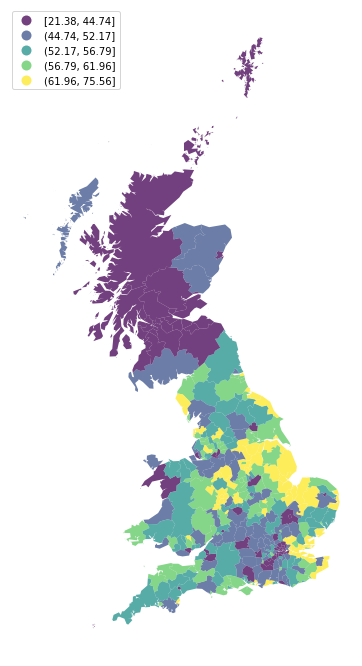

In [17]:
f, ax = plt.subplots(1, figsize=(12, 12))
db.plot(column='Pct_Leave', 
        cmap='viridis', 
        scheme='quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={"loc": 2},
        ax=ax
       )
# contextily.add_basemap(ax, 
#                        crs=db.crs, 
#                        source=contextily.providers.Stamen.TerrainBackground
#                       )
ax.set_axis_off()

La pieza final que necesitamos antes de poder profundizar en la autocorrelación es la **matriz de pesos espaciales**.

Usaremos ocho vecinos más cercanos por el bien del ejemplo, pero la discusión en el capítulo anterior sobre ponderaciones se aplica en este contexto, y otros criterios también serían válidos. También los estandarizamos en filas:

In [18]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = 'R'

## Autocorrelación espacial global

El mapa de arriba es una buena manera de comenzar a explorar los principales patrones espaciales en los datos. A primera vista, parece mostrar una buena cantidad de autocorrelación espacial positiva: las autoridades locales con altos porcentajes de votos para salir de la UE tienden a estar juntas (ver, por ejemplo, la región oriental), al igual que aquellas en las que un una proporción mucho menor de su población votó a favor de irse (Escocia es un buen ejemplo en el norte).

Sin embargo, los humanos son muy buenos detectores de patrones. A lo largo de nuestra historia desde que comenzamos como especie, la vida ha recompensado las habilidades de reconocimiento de patrones y ha castigado a las personas que carecen de ellas.

**Esta extraordinaria capacidad para detectar tendencias, patrones y asociaciones también tiende a crear muchos falsos positivos**: casos en los que pensamos que hay un patrón pero, de hecho, lo que estamos viendo es en gran parte aleatorio. Esto se acentúa particularmente en el caso de mapas donde, como hemos visto en el capítulo de cartografía de coropletas, la forma de las geometrías también puede distorsionar significativamente nuestra percepción. Al mirar el mapa de arriba, por ejemplo, podemos tener una suposición fundamentada sobre la presencia de autocorrelación espacial; pero determinar realmente si lo que estamos viendo pudo provenir de pura casualidad o no, es generalmente más fácil de decir que de hacer. 

**Ese es exactamente el propósito de los indicadores de autocorrelación espacial global:** aprovechar el poder de las estadísticas para ayudarnos primero a resumir la distribución espacial de valores presentes en un mapa, y segundo obtener una cuantificación formal de la desviación de la aleatoriedad. Las estadísticas diseñadas para medir esta tendencia caracterizan así un mapa en términos de su grado de agrupamiento y lo resumen, ya sea de forma visual o numérica. 

Sin embargo, antes de que podamos profundizar en las estadísticas, necesitamos comprender un bloque de construcción central: el **retraso espacial**. Con ese concepto bajo el cinturón, estamos en condiciones de construir una buena comprensión de la autocorrelación espacial global. Lo ingresaremos suavemente con el caso binario, cuando las observaciones solo pueden tomar dos valores (potencialmente categóricos), antes de cubrir los dos caballos de batalla del caso continuo:

### Retraso espacial (Spatial Lag)

El operador de retardo espacial es una de las aplicaciones más comunes y directas de las matrices de ponderaciones espaciales (W's) en análisis espacial. La definición matemática es el producto de W y el vector de una variable dada. Conceptualmente, el rezago espacial captura el comportamiento de una variable en el entorno inmediato de cada ubicación; en ese sentido, es similar a un suavizador local de una variable.

Podemos expresarlo formalmente en notación matricial como:

    Ysl = WY
    
Como descubriremos a lo largo de este libro, el retraso espacial es un elemento clave de muchas técnicas de análisis espacial y, como tal, está totalmente respaldado en PySAL. Para calcular el retraso espacial de una variable dada, 'Pct_Leave' por ejemplo, podemos hacerlo de la siguiente manera:

In [19]:
db['Pct_Leave_lag'] = weights.spatial_lag.lag_spatial(w, db['Pct_Leave'])

Examinemos dos distritos de autoridades locales para tener una mejor intuición de lo que hay detrás del rezago espacial:

In [20]:
db.loc[['E08000012', 'S12000019'], 
       ['Pct_Leave', 'Pct_Leave_lag']]

,Pct_Leave,Pct_Leave_lag
lad16cd,,
E08000012,41.81,54.61375
S12000019,37.94,38.01875


- *La primera fila ( E08000012) representa Liverpool*, que era una notoria isla "remanente" entre la mayoría de países que abandonan el norte de Inglaterra. Fuera de Londres y Escocia, fue uno de los pocos lugares con menos de la mayoría para salir. 
- *La segunda fila ( S12000019) representa Midlothian, en Escocia, donde ninguna autoridad local votó a favor de irse*. Aunque tanto Liverpool como Midlothian muestran un porcentaje similar de población que votó a favor de irse (42% y 38%, respectivamente), la diferencia en sus rezagos espaciales captura el contexto geográfico más amplio, que era bastante opuesto.

Para finalizar visualmente esta sección, la naturaleza suavizante del retraso se puede apreciar en la siguiente comparación de mapas:

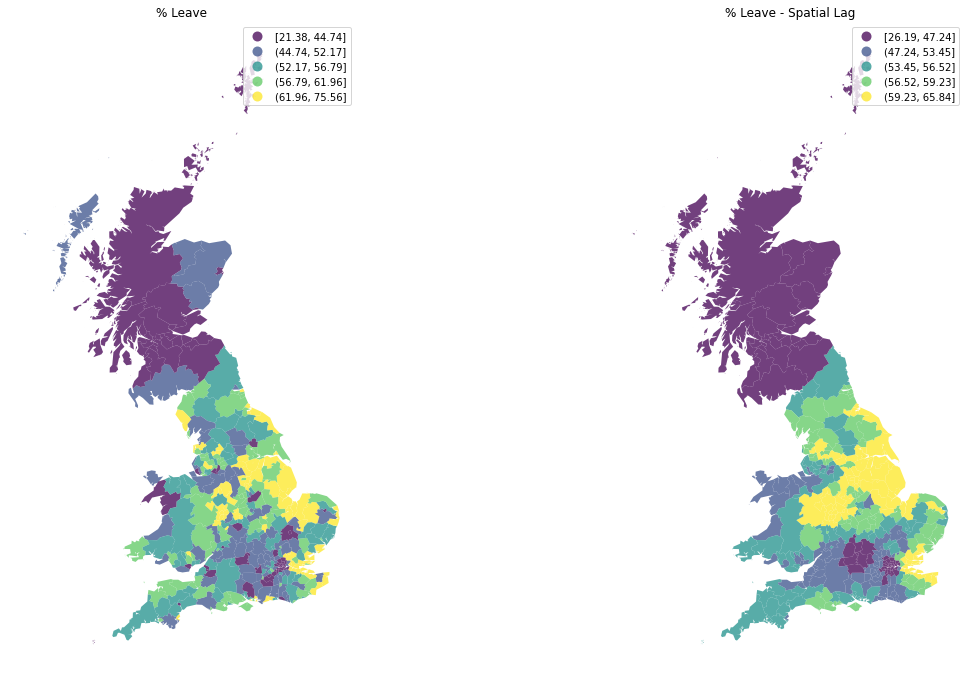

In [24]:
f, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1, ax2 = axs

db.plot(column='Pct_Leave', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
# contextily.add_basemap(ax1, 
#                        crs=db.crs, 
#                        source=contextily.providers.Stamen.TerrainBackground,
                       
#                       )

db.plot(column='Pct_Leave_lag', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
# contextily.add_basemap(ax2, 
#                        crs=db.crs, 
#                        source=contextily.providers.Stamen.TerrainBackground,
                       
#                       )

plt.show()

Las marcadas diferencias a la izquierda entre vecinos inmediatos (como en el caso de Liverpool, en el noroeste de Inglaterra) se reducen en el mapa de la derecha.



### Caso binario: recuentos de combinaciones

El retraso espacial juega un papel importante en la cuantificación de la autocorrelación espacial. Utilizándolo, podemos comenzar a relacionar el comportamiento de una variable en una ubicación dada con su patrón en la vecindad inmediata. Las medidas de autocorrelación espacial global utilizarán cada observación para construir medidas generales sobre la tendencia general en un conjunto de datos dado.

Nuestra primera inmersión en estas medidas considera un caso simplificado: valores binarios. Esto ocurre cuando la variable que nos interesa solo toma dos valores. En este contexto, nos interesa saber si una observación determinada está rodeada de otras dentro de la misma categoría. Por ejemplo, volviendo a nuestro conjunto de datos, queremos evaluar hasta qué punto las autoridades locales que votaron a favor de Abandonar tienden a estar rodeadas de otras personas que también votaron a favor de hacerlo. Para continuar, primero calculemos una variable binaria (Leave) que indica 1 si la autoridad local votó a favor de irse, y cero en caso contrario:

In [25]:
db['Leave'] = (db['Pct_Leave'] > 50).astype(int)
db[['Pct_Leave', 'Leave']].tail()

,Pct_Leave,Leave
lad16cd,,
W06000018,57.63,1
W06000019,62.03,1
W06000021,49.56,0
W06000022,55.99,1
W06000023,53.74,1


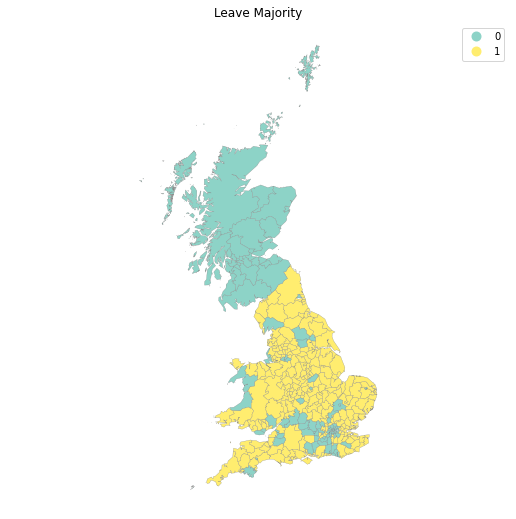

In [27]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(ax=ax, column='Leave', categorical=True, legend=True, 
        edgecolor='0.5', linewidth=0.25, cmap='Set3', 
        figsize=(9, 9));
ax.set_axis_off()
ax.set_title('Leave Majority')
plt.axis('equal')
plt.show()

isualmente, parece que el mapa representa un caso claro de autocorrelación espacial positiva: en general, hay pocos casos visibles en los que una observación dada está rodeada por otras en la categoría opuesta. Para explorar formalmente esta evaluación inicial, podemos usar lo que se llama una estadística de **"recuento de uniones "**

Imagina un tablero de ajedrez con cuadrados verdes (G, valor 0) y amarillos (Y, valor 1). La idea de la estadística es contar las ocurrencias de uniones verde-verde (GG), amarillo-amarillo (YY) o verde-amarillo / amarillo-verde (GY) (o pares vecinos) en el mapa.

En este contexto, tanto GG como YY reflejan una autocorrelación espacial positiva, mientras que GY captura su contraparte negativa. La intuición de la estadística es proporcionar una línea de base de cuántos GG, YY y GY uno esperaría en el caso de aleatoriedad espacial completa, y comparar esto con los recuentos observados en el conjunto de datos. Una situación en la que observamos más GG / YY de lo esperado y menos GY de lo esperado sugeriría una autocorrelación espacial positiva; mientras que al contrario, más GY que GG / YY, apuntaría hacia una autocorrelación espacial negativa.

Dado que las ponderaciones espaciales solo se utilizan aquí para delimitar quién es vecino o no, la estadística de recuento de combinaciones requiere ponderaciones binarias. Transformemos así de nuevo 'w' a un estado no estandarizado:

In [28]:
w.transform

'R'

In [29]:
w.transform = 'O'
w.transform

'O'

Podemos calcular la estadística como:

In [30]:
seed(1234)
jc = esda.join_counts.Join_Counts(db['Leave'], w)
jc

Estamos creando un objeto (jc) que contiene mucha información más allá del valor de la estadística calculada. 

Por ejemplo, podemos verificar cuántas ocurrencias de GG tenemos (tenga en cuenta que el atributo es bb, que se origina en la referencia original donde las dos clases consideradas eran blanco y negro):

In [31]:
jc.bb

871.0

cuántas ocurrencias YY tiene nuestro mapa:

In [33]:
jc.ww

302.0

y cuántos GY / YG encontramos:

In [35]:
jc.bw

347.0

La suma de esos tres nos da el número total de comparaciones:

In [37]:
jc.bb + jc.ww + jc.bw

1520.0

o

In [38]:
jc.J

1520.0

La estadística se basa en la comparación del número real de uniones de cada clase ( bb, ww, bc) con lo que uno esperaría en un caso de aleatoriedad espacial. 

También se puede acceder a esas expectativas, para el caso GG / YY:

In [40]:
jc.mean_bb

727.4124124124124

y para GY se une:

In [41]:
jc.mean_bw

649.3233233233233

Se puede acceder a la inferencia estadística para obtener una idea de si es probable que estos valores provengan de un azar aleatorio o no como:

In [49]:
jc.p_sim_bb

0.001

In [43]:
jc.p_sim_bw

1.0

Estos resultados apuntan a una clara presencia de **autocorrelación espacial positiva**
- ya que hay muchas más uniones de pares en la misma categoría de lo que cabría esperar ( p_sim_bb) 
- y significativamente menos de uniones opuestas ( p_sim_bw)

In [51]:
esda.join_counts.Join_Counts?

Init signature: esda.join_counts.Join_Counts(y, w, permutations=999)
Docstring:     
Binary Join Counts


Parameters
----------

y               : array
                  binary variable measured across n spatial units
w               : W
                  spatial weights instance
permutations    : int
                  number of random permutations for calculation of pseudo-p_values

Attributes
----------
y            : array
               original variable
w            : W
               original w object
permutations : int
               number of permutations
bb           : float
               number of black-black joins
ww           : float
               number of white-white joins
bw           : float
               number of black-white joins
J            : float
               number of joins
sim_bb       : array
               (if permutations>0)
               vector of bb values for permuted samples
p_sim_bb     : array
              (if permutations>0)
               p-v

### Caso continuo: Moran Plot y Moran's I 

Una vez que hemos construido algo de intuición sobre cómo se puede evaluar formalmente la autocorrelación espacial en el caso binario, pasemos a situaciones en las que la variable de interés no solo toma dos valores, sino que es continua

Para comprender la intuición detrás de sus matemáticas, es útil comenzar con una interpretación gráfica: la trama de Moran. Moran Plot es una forma de visualizar un conjunto de datos espaciales para explorar la naturaleza y la fuerza de la autocorrelación espacial. Es esencialmente un diagrama de dispersión tradicional en el que la variable de interés se muestra frente a su rezago espacial . Para poder interpretar valores por encima o por debajo de la media, y sus cantidades en términos de desviaciones estándar, la variable de interés generalmente se estandariza restando su media y dividiéndola por su desviación estándar:

In [54]:
#Escalado estándar
db['Pct_Leave_std'] = ( db['Pct_Leave'] - db['Pct_Leave'].mean() )\
                      / db['Pct_Leave'].std()
db['Pct_Leave_lag_std'] = ( db['Pct_Leave_lag'] - db['Pct_Leave_lag'].mean() )\
                      / db['Pct_Leave_lag'].std()

Técnicamente hablando, crear un diagrama de Moran es muy similar a crear cualquier otro diagrama de dispersión en Python:

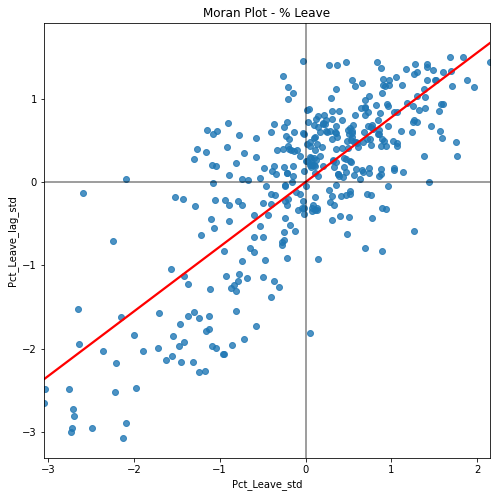

In [75]:
f, ax = plt.subplots(1, figsize=(8, 8))
seaborn.regplot(x='Pct_Leave_std', y='Pct_Leave_lag_std', 
                ci=None, data=db, line_kws={'color':'r'})
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
ax.set_title('Moran Plot - % Leave')
plt.show()

El gráfico muestra una relación positiva entre ambas variables. Esto está asociado con la presencia de autocorrelación espacial positiva: valores similares tienden a ubicarse cerca unos de otros. Esto significa que la tendencia general es que los valores altos estén cerca de otros valores altos y que los valores bajos estén rodeados por otros valores bajos.

Sin embargo, esto no significa que este sea el único caso en el conjunto de datos: por supuesto, puede haber situaciones particulares en las que los valores altos estén rodeados de valores bajos, y viceversa. Pero significa que, si tuviéramos que resumir el patrón principal de los datos en términos de cuán agrupados están los valores similares, la mejor manera sería decir que están correlacionados positivamente y, por lo tanto, agrupados en el espacio. 

En el contexto del ejemplo, esto se puede interpretar de la siguiente manera: **Las autoridades locales donde la gente votó en una alta proporción para salir de la UE tienden a estar ubicadas cerca de otras regiones que también registraron altas proporciones de abandono del voto**. En otras palabras, podemos decir que **el porcentaje de votos de abandono está espacialmente autocorrelacionado de manera positiva.**

Moran Plot es una excelente herramienta para explorar los datos y tener una buena idea de cuántos valores están agrupados en el espacio. Sin embargo, debido a que es un dispositivo gráfico, a veces es difícil condensar sus conocimientos de una manera más concisa. Para estos casos, un buen enfoque es elaborar una **medida estadística que resuma la cifra**. Esto es exactamente lo que el **I de Moran**, como se expresó formalmente anteriormente, está destinado a hacer.

In [76]:
w.transform = 'R'
moran = esda.moran.Moran(db['Pct_Leave'], w)

In [77]:
moran.I

0.6454521298096587

La otra parte de la información que extraeremos del I de Moran se relaciona con la inferencia estadística: ¿qué tan probable es que el patrón que observamos en el mapa y el I de Moran captura en su valor sea generado por un proceso completamente aleatorio? 

Para obtener información sobre estas preguntas, PySAL realiza una simulación y devuelve una medida de certeza sobre la probabilidad de que el patrón que observamos en nuestro conjunto de datos provenga de un proceso espacialmente aleatorio

In [78]:
moran.p_sim

0.001

Un valor p lo suficientemente pequeño asociado con el I de Moran de un mapa permite rechazar la hipótesis de que el mapa es aleatorio. En otras palabras, podemos concluir que el mapa muestra un patrón espacial más de lo que esperaríamos si los valores se hubieran asignado aleatoriamente a una ubicación.

Si recordamos nuevamente que el valor de la I de Moran también se puede interpretar como la pendiente de la gráfica de Moran, lo que tenemos es que, en este caso, la disposición espacial particular de valores sobre el espacio que observamos para el porcentaje de votos de salida está más concentrada que si tuviéramos que barajar aleatoriamente las proporciones de votos entre el mapa, de ahí la significación estadística. Como primer paso, el análisis de autocorrelación global puede enseñarnos que las observaciones parecen estar positivamente autocorrelacionadas en el espacio. De hecho, el patrón espacial general en la votación del referéndum de la UE fue muy marcado: las áreas cercanas tendían a votar por igual.
